# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My husband and I booked seat...
1,"Not Verified | May 3, flew from Seattle to He..."
2,✅ Trip Verified | I went through three flights...
3,✅ Trip Verified | An excellent flight in Club ...
4,✅ Trip Verified | The flight schedule was dela...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,✅ Trip Verified | My husband and I booked seat...
1,"Not Verified | May 3, flew from Seattle to He..."
2,✅ Trip Verified | I went through three flights...
3,✅ Trip Verified | An excellent flight in Club ...
4,✅ Trip Verified | The flight schedule was dela...
...,...
995,✅ Trip Verified | London to Amsterdam. BA's s...
996,✅ Trip Verified | Aberdeen to Abu Dhabi via L...
997,✅ Trip Verified | Prague to Denver via London...
998,✅ Trip Verified | Seville to Gatwick. If it w...


In [ ]:
df.reviews.unique()

array(['✅ Trip Verified | My husband and I booked seats within our premium economy booking. On both outward journey BA015 on 12 February and return on 11 March we were last OR almost last to be served food. Each time they had run out of our choices. On one occasion I did not eat as only available option was curry which disagrees with me. On all flights there appeared to be an undue focus on curry/spicy food. All in all very disappointing and left us with a very poor opinion of British Airways.',
       'Not Verified |  May 3, flew from Seattle to Heathrow then to Edinburgh. BA lost my golf bag which caused me to purchase golf shoes, club rentals, tees, balls. I had tee times at two courses in St. Andrews that took months to make. The promised my bag returned in 24 hours and they would reimburse occurred expenses. I contacted BA and they state they would only reimburse toiletries. Then the return flight home was randomly canceled by BA without notifying me or without notice two weeks be

In [ ]:
df.reviews.str.contains('|').any()

True

In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,My husband and I booked seats within our prem...
1,"May 3, flew from Seattle to Heathrow then to..."
2,I went through three flights to reach my dest...
3,An excellent flight in Club World on British ...
4,The flight schedule was delayed for one hour....
...,...
995,London to Amsterdam. BA's service has gone n...
996,Aberdeen to Abu Dhabi via London. Despite be...
997,Prague to Denver via London. I almost missed...
998,Seville to Gatwick. If it wasn't for Avios a...


Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1:Text Cleaning

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...
1,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...
2,I went through three flights to reach my dest...,I went through three flights to reach my dest...
3,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...
4,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...


#Step 2:Tokenization
Tokenization is the division of the text into tokens, which are smaller parts. Word tokenization or sentence tokenization can be used to execute the operation.

#Step 3: POS tagging for enrichment
Tokens are transformed into tuples with the form (word, tag) through the process of parts of speech (POS) tagging. Lemmatization and POS tagging are both necessary to maintain the word's context.

#Step 4 : Eliminating stopwords
In English, words that provide little valuable information are known as stopwords. As part of text preparation, they must be eliminated. Stopwords for every language are listed on nltk.

#Step 5: Getting the stem words
A word's lexical meaning is determined by its stem. Stemming and lemmatization are the two widely used methods for finding the root/stem words.

The main distinction is that stemming frequently produces useless root words because it merely removes certain characters at the end. Lemmatization produces useful root words, but it necessitates the POS tags of the terms.


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Access to the contents of a variety of corpora is made possible by the corpus reader classes defined in the nltk.corpus package.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...,"[(husband, n), (booked, v), (seats, n), (withi..."
1,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,..."
2,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac..."
3,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl..."
4,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on..."
...,...,...,...
995,London to Amsterdam. BA's service has gone n...,London to Amsterdam BA s service has gone not...,"[(London, n), (Amsterdam, n), (BA, n), (servic..."
996,Aberdeen to Abu Dhabi via London. Despite be...,Aberdeen to Abu Dhabi via London Despite bein...,"[(Aberdeen, n), (Abu, n), (Dhabi, n), (via, No..."
997,Prague to Denver via London. I almost missed...,Prague to Denver via London I almost missed m...,"[(Prague, n), (Denver, n), (via, None), (Londo..."
998,Seville to Gatwick. If it wasn't for Avios a...,Seville to Gatwick If it wasn t for Avios and...,"[(Seville, n), (Gatwick, v), (Avios, n), (fant..."


In [ ]:
# How to get the stem words: Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...,"[(husband, n), (booked, v), (seats, n), (withi...",husband book seat within premium economy boo...
1,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,...",May fly Seattle Heathrow Edinburgh BA lose g...
2,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac...",go three flight reach destination BA flight ...
3,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl...",excellent flight Club World British Airways ...
4,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on...",flight schedule delay one hour board plane d...


In [ ]:
df[["reviews","Lemma"]]

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...,"[(husband, n), (booked, v), (seats, n), (withi...",husband book seat within premium economy boo...,-0.8442,Negative
1,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,...",May fly Seattle Heathrow Edinburgh BA lose g...,-0.7717,Negative
2,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac...",go three flight reach destination BA flight ...,-0.4767,Negative
3,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl...",excellent flight Club World British Airways ...,0.9899,Positive
4,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on...",flight schedule delay one hour board plane d...,-0.8402,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    513
Negative    381
Neutral     106
Name: Analysis, dtype: int64

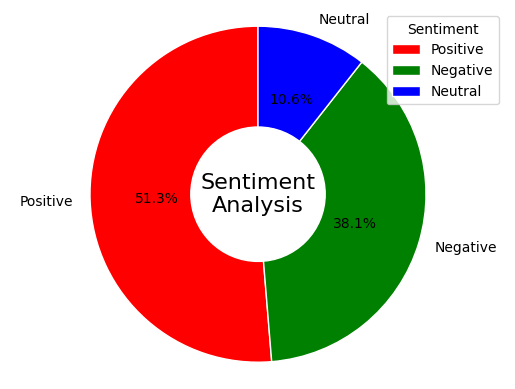

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Analysis' column
analysis_counts = df['Analysis'].value_counts()

# Define colors for each sentiment label
colors = ['red', 'green', 'blue']

# Plot the pie chart
plt.pie(
    analysis_counts,
    labels=analysis_counts.index,
    autopct='%1.1f%%',
    shadow=False,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
# Customize the percentage values
for autotext in autotexts:
    autotext.set_fontsize(30)

# Add a legend
plt.legend(title='Sentiment', loc='upper right')

# Add a circle at the center to make it a donut chart
circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(circle)

# Add the title inside the white portion
plt.text(0, 0, "Sentiment\nAnalysis", ha='center', va='center', fontsize=16)

# Set aspect ratio to equal so that pie is drawn as a circle
plt.axis('equal')

# Show the chart
plt.show()


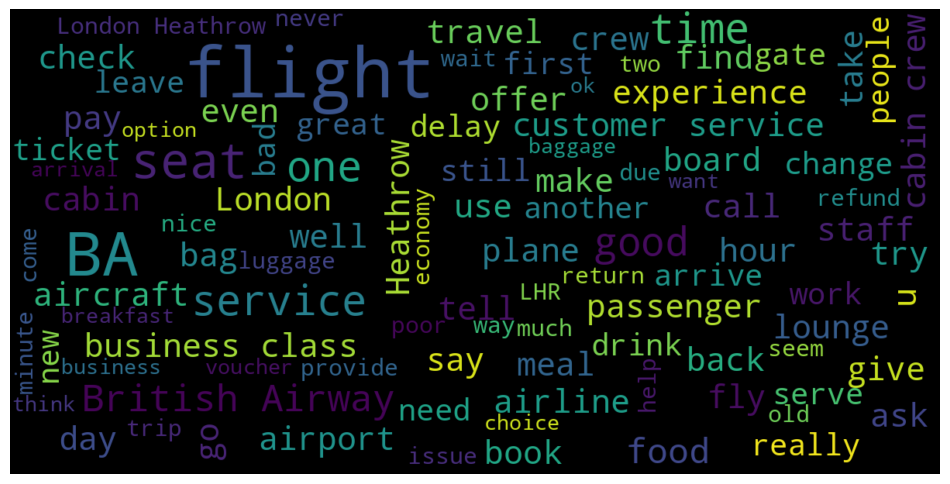

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the lemmas into a single string
text = ' '.join(df['Lemma'])

# Create a WordCloud object
wordcloud = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    max_words=100,
    max_font_size=30,
    scale=3,
    random_state=1
).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
